<h3>The goal is to predict how likely individuals are to receive their H1N1 vaccines. </h3>

Each row in the dataset represents one person who responded to the National 2009 H1N1 Flu Survey and the target variable is
    <ul><li>h1n1_vaccine: Whether respondent received H1N1 flu vaccine.</li></ul>


You are provided a dataset with 36 columns. The first column respondent_id is a unique and random identifier. The remaining 35 features are described below( <b>For all binary variables: 0 = No; 1 = Yes</b>) :

<ol>
<li>age_bracket - Age group of respondent.
<li>qualification - Self-reported education level.
<li>race - Race of respondent.
<li>sex - Gender of respondent.
<li>income_level - Household annual income of respondent with respect to 2008 Census poverty thresholds.
<li>marital_status - Marital status of respondent.
<li>housing_status - Housing situation of respondent.
<li>employment - Employment status of respondent.</li>
<li>h1n1_worry - Level of concern about the H1N1 flu.</li>
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
<li>h1n1_awareness - Level of knowledge about H1N1 flu.</li>
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
<li>wash_hands_frequently - Has frequently washed hands or used hand sanitizer. (binary)</li>
<li>avoid_large_gatherings - Has reduced time at large gatherings. (binary)</li>
<li>antiviral_medication - Has taken antiviral medications. (binary)</li>
<li>contact_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)</li>
<li>bought_face_mask - Has bought a face mask. (binary)</li>
<li>reduced_outside_home_cont	 - Has reduced contact with people outside of own household. (binary)</li>
<li>avoid_touch_face - Has avoided touching eyes, nose, or mouth. (binary)</li>
<li>dr_recc_h1n1_vacc - H1N1 flu vaccine was recommended by doctor. (binary)</li>
<li>chronic_medic_condition	 - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)</li>
<li>cont_child_undr_6_mnths - Has regular close contact with a child under the age of six months. (binary)</li>
<li>is_health_worker - Is a healthcare worker. (binary)</li>
<li>has_health_insur - Has health insurance. (binary)</li>
<li>is_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.</li>
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
<li>opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.</li>
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
<li>opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.</li>
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
<li>is_seas_risky - Respondent's opinion about seasonal flu vaccine effectiveness.</li>
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
<li>is_h1n1_risky - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.</li>
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
<li>sick_from_seas_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.</li>
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
<li>census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.</li>
<li>no_of_adults - Number of other adults in household, top-coded to 3.</li>
<li>no_of_children - Number of children in household, top-coded to 3.</li>


### Importing libraries

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE

### Importing Data

In [122]:
df=pd.read_csv("h1n1_vaccine_prediction.csv")

In [123]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

Dropping Unique_id because it will help in nothing

In [125]:
df.drop(['unique_id'],axis=1,inplace=True)

Frequency of null values in each columns

<AxesSubplot:>

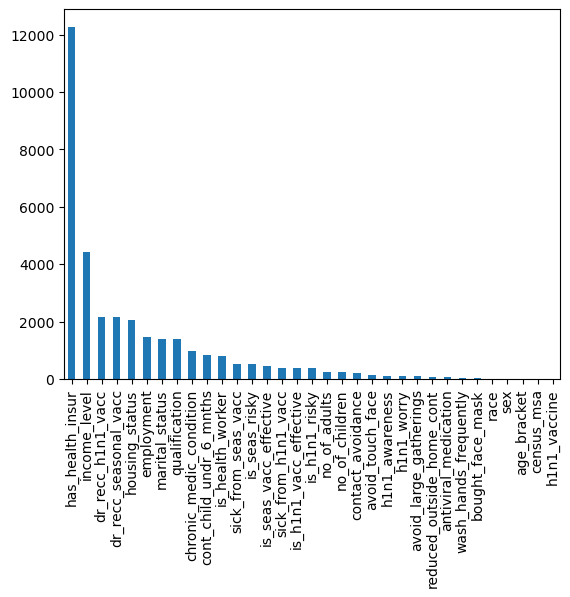

In [134]:
df.isna().sum().sort_values(ascending=False).plot(kind='bar')

Dropping the below columns as this might not affect our prediction

In [141]:
df.drop(['race','sex','income_level','housing_status','census_msa'],axis=1, inplace=True)

### Missing value replacement with mode

In [142]:
for col in df.columns:
    if df[col].isna().sum()>0:
        df[col].fillna(df[col].mode()[0],inplace=True)

In [143]:
df.isna().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
marital_status               0
employment                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: int64

In [144]:
obj=df.select_dtypes(object).columns

Encoding categorical features with get_dummies method

In [145]:
df=pd.get_dummies(df,columns=obj)

In [146]:
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine,age_bracket_18 - 34 Years,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,qualification_12 Years,qualification_< 12 Years,qualification_College Graduate,qualification_Some College,marital_status_Married,marital_status_Not Married,employment_Employed,employment_Not in Labor Force,employment_Unemployed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0


In [147]:
df.shape

(26707, 38)

### Visualizations

<AxesSubplot:ylabel='no_of_adults'>

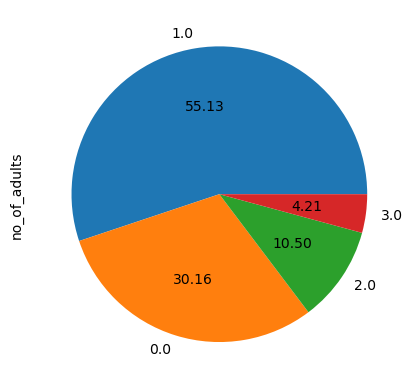

In [148]:
df['no_of_adults'].value_counts().plot(kind='pie',autopct='%.2f')

About 50% has only 1 adult in their house

<AxesSubplot:title={'center':'Consuming anti-viral medication'}, xlabel='antiviral_medication', ylabel='count'>

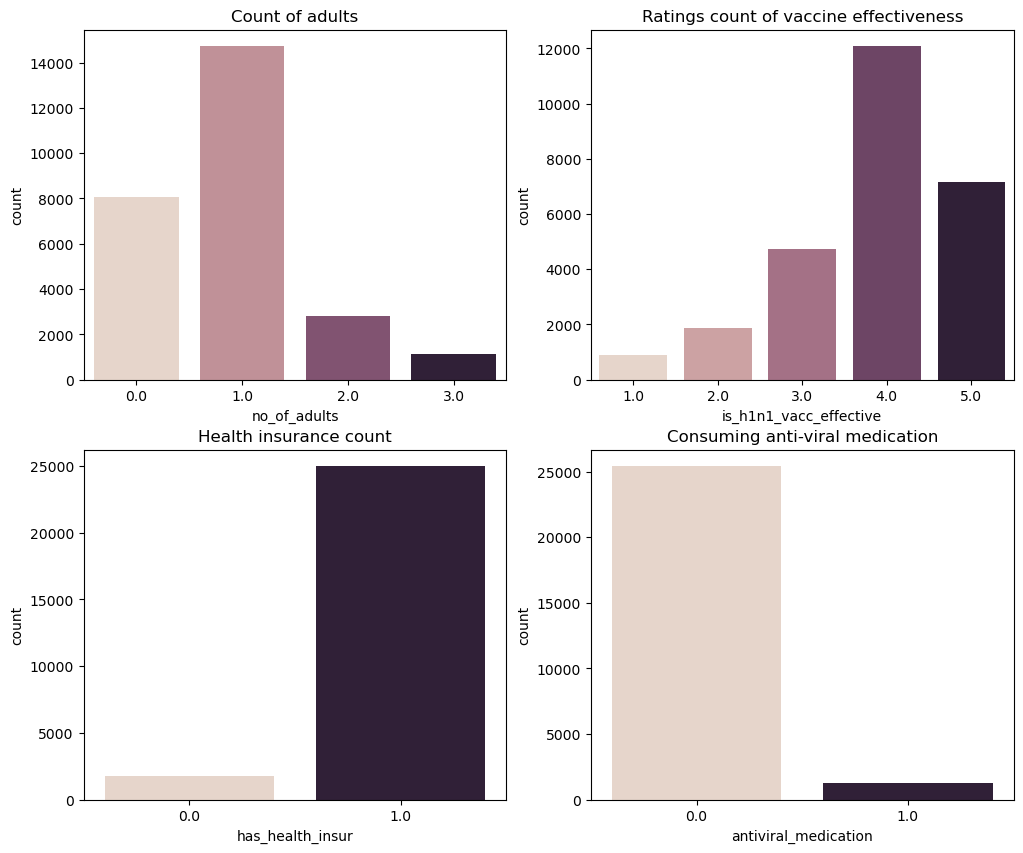

In [204]:

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.title('Count of adults')
sns.countplot(df['no_of_adults'],palette="ch:.111")
plt.subplot(2,2,2)
plt.title('Ratings count of vaccine effectiveness')
sns.countplot(df['is_h1n1_vacc_effective'],palette="ch:.111")
plt.subplot(2,2,3)
plt.title('Health insurance count')
sns.countplot(df['has_health_insur'],palette="ch:.111")
plt.subplot(2,2,4)
plt.title('Consuming anti-viral medication')
sns.countplot(df['antiviral_medication'],palette="ch:.111")

<AxesSubplot:xlabel='is_health_worker'>

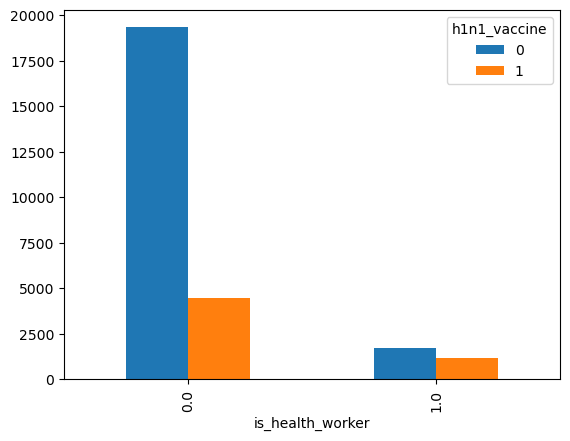

In [177]:
pd.crosstab(df.is_health_worker,df.h1n1_vaccine).plot(kind='bar')

We can see that mostly all health worker has took the h1n1 vaccine 

<AxesSubplot:xlabel='marital_status_Married'>

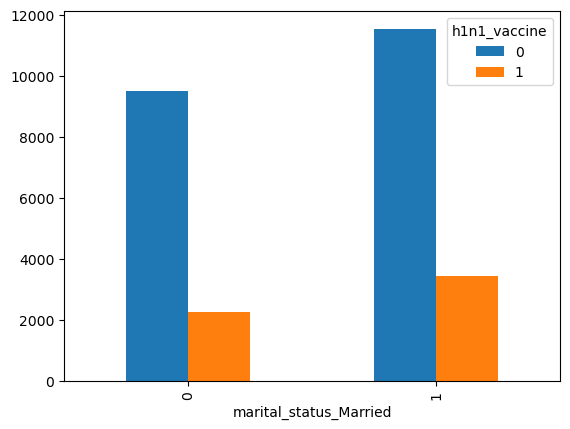

In [154]:
pd.crosstab(df.marital_status_Married,df.h1n1_vaccine).plot(kind='bar')

About 40% of the married guys have took the vaccine

<AxesSubplot:xlabel='h1n1_worry'>

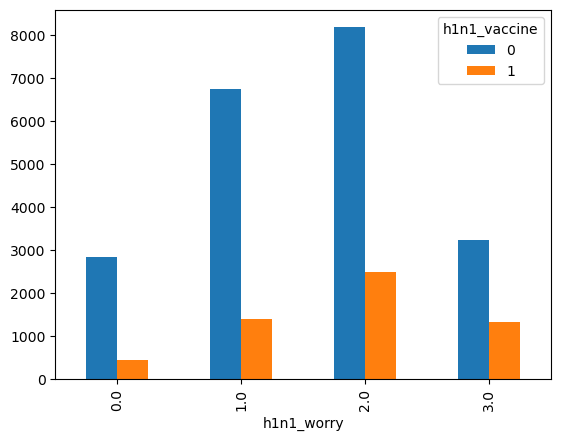

In [155]:
pd.crosstab(df.h1n1_worry,df.h1n1_vaccine).plot(kind='bar')

People who doesn't have the fear of h1n1 have took the vaccine in a very small fraction, whereas 50% of people who has worry about h1n1, have took the vaccine.

<AxesSubplot:xlabel='h1n1_worry'>

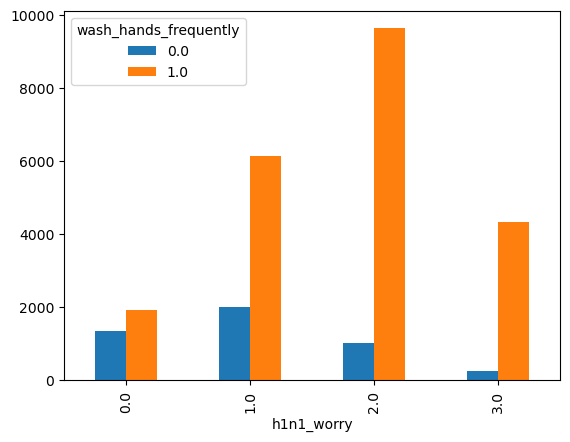

In [156]:
pd.crosstab(df.h1n1_worry,df.wash_hands_frequently).plot(kind='bar')

We can interpret that, people who wash their hands frequently have less worry about the h1n1, whereas about 80% people who doesn't wash their hands so frequently have worry about the virus.

### Checking whether target variable is balanced

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

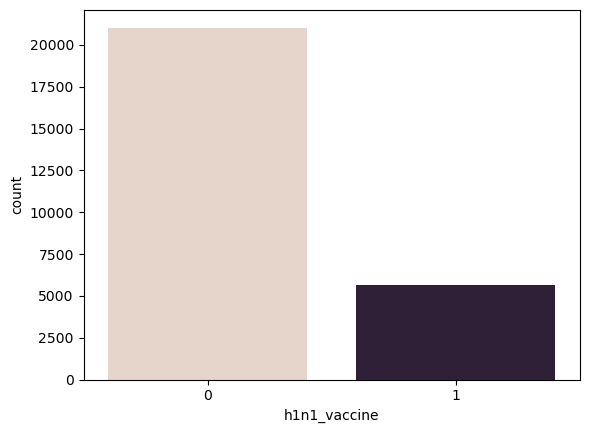

In [205]:
sns.countplot(df['h1n1_vaccine'],palette="ch:.111")

Target variable is imbalanced. As this may lead to mis-classification, we are using SMOTE to upsample it.

In [178]:
x=df.drop(['h1n1_vaccine'],axis=1)

In [179]:
y=df['h1n1_vaccine']

In [180]:
oversample=SMOTE()
xsmote,ysmote=oversample.fit_resample(x,y)

In [181]:
xsmote.shape

(42066, 37)

In [182]:
xtrain,xtest,ytrain,ytest=train_test_split(xsmote,ysmote,random_state=123,test_size=0.2)

### Pre-defined function

In [ ]:
def report(actual,pred):
    acc_score=accuracy_score(actual,pred)
    con_mat=confusion_matrix(actual,pred)
    class_rep=classification_report(actual,pred)
    print("Accuracy of model is", round((acc_score*100),2),'%')
    print('\n ',con_mat)
    print('\n',class_rep)

### Logistic Regression

In [183]:
log=LogisticRegression()
log.fit(xtrain,ytrain)

LogisticRegression()

In [184]:
preds_train=log.predict(xtrain)
pred_test=log.predict(xtest)

In [186]:
report (ytrain,preds_train)
report(ytest,pred_test)

Accuracy of model is 83.63 %

  [[14841  2027]
 [ 3482 13302]]

               precision    recall  f1-score   support

           0       0.81      0.88      0.84     16868
           1       0.87      0.79      0.83     16784

    accuracy                           0.84     33652
   macro avg       0.84      0.84      0.84     33652
weighted avg       0.84      0.84      0.84     33652

Accuracy of model is 84.09 %

  [[3653  512]
 [ 827 3422]]

               precision    recall  f1-score   support

           0       0.82      0.88      0.85      4165
           1       0.87      0.81      0.84      4249

    accuracy                           0.84      8414
   macro avg       0.84      0.84      0.84      8414
weighted avg       0.84      0.84      0.84      8414



### Decision Tree

In [187]:
dt=DecisionTreeClassifier(max_depth=11)
dt.fit(xtrain,ytrain)
train_dt=dt.predict(xtrain)
test_dt=dt.predict(xtest)
report(ytrain,train_dt)
report(ytest,test_dt)

Accuracy of model is 87.31 %

  [[15485  1383]
 [ 2888 13896]]

               precision    recall  f1-score   support

           0       0.84      0.92      0.88     16868
           1       0.91      0.83      0.87     16784

    accuracy                           0.87     33652
   macro avg       0.88      0.87      0.87     33652
weighted avg       0.88      0.87      0.87     33652

Accuracy of model is 85.48 %

  [[3735  430]
 [ 792 3457]]

               precision    recall  f1-score   support

           0       0.83      0.90      0.86      4165
           1       0.89      0.81      0.85      4249

    accuracy                           0.85      8414
   macro avg       0.86      0.86      0.85      8414
weighted avg       0.86      0.85      0.85      8414



### Random Forest

In [188]:
rf=RandomForestClassifier(n_estimators=130,max_depth=12,min_samples_split=8)
rf.fit(xtrain,ytrain)
train_rf=rf.predict(xtrain)
test_rf=rf.predict(xtest)
report(ytrain,train_rf)
report(ytest,test_rf)

Accuracy of model is 90.54 %

  [[15592  1276]
 [ 1908 14876]]

               precision    recall  f1-score   support

           0       0.89      0.92      0.91     16868
           1       0.92      0.89      0.90     16784

    accuracy                           0.91     33652
   macro avg       0.91      0.91      0.91     33652
weighted avg       0.91      0.91      0.91     33652

Accuracy of model is 88.51 %

  [[3752  413]
 [ 554 3695]]

               precision    recall  f1-score   support

           0       0.87      0.90      0.89      4165
           1       0.90      0.87      0.88      4249

    accuracy                           0.89      8414
   macro avg       0.89      0.89      0.89      8414
weighted avg       0.89      0.89      0.89      8414



### Plotting accuracy of different models

In [189]:
acc=pd.DataFrame({'models':['Logistic Reg','Dtree','Random forest'],
                  'score':[83.8,85.57,88.57]})

[Text(0, 0, '83.8'), Text(0, 0, '85.57'), Text(0, 0, '88.57')]

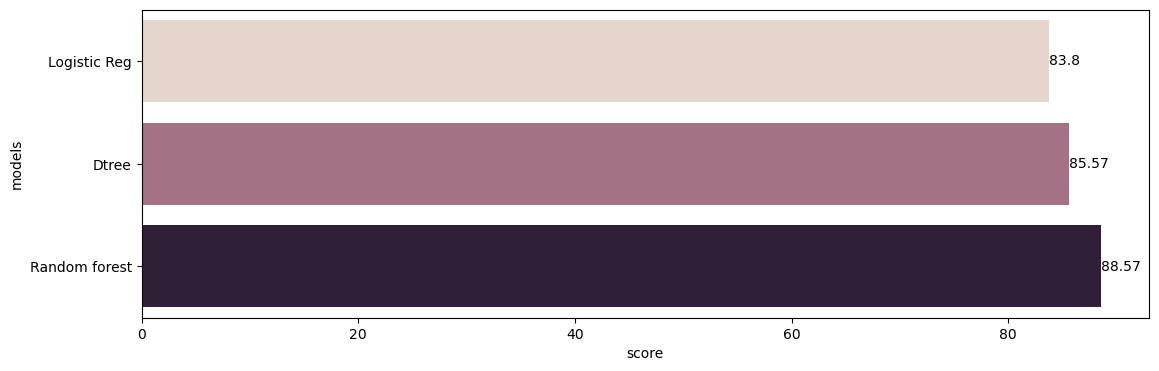

In [200]:
plt.figure(figsize=(13,4))
ax=sns.barplot(x='score',y='models',data=acc,palette='ch:.120',errwidth=0)
ax.bar_label(ax.containers[0])

##### <b>Random forest</b> performs well amongst all the three